In [33]:
import sys
assert sys.version_info >= (3, 5)

In [34]:
import sklearn
assert sklearn.__version__ >= "0.20"


In [35]:
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import seaborn as sns
import urllib.request
from sklearn.metrics import roc_auc_score, precision_score, recall_score

In [36]:
# Import for plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [37]:
DataScience = pd.read_csv("/Users/mac/Downloads/ds_salaries.csv")

In [38]:
DataScience.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [39]:
DataScience.isnull().sum()   

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [40]:
DataScience['experience_level']=DataScience['experience_level'].map({'EX':3,'EN':2,'SE':1,'MI':0})  # covert the gender to categorical for processing


In [41]:
DataScience["experience_level"].value_counts()


1    280
0    213
2     88
3     26
Name: experience_level, dtype: int64

In [42]:
DataScience["employee_residence"].value_counts()


US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

In [43]:
Experience_EN=DataScience["experience_level"]==1
DataScience["Experience"]=Experience_EN
DataScience.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Experience
0,0,2020,0,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,False
1,1,2020,1,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,True
2,2,2020,1,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,True
3,3,2020,0,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,False
4,4,2020,1,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,True


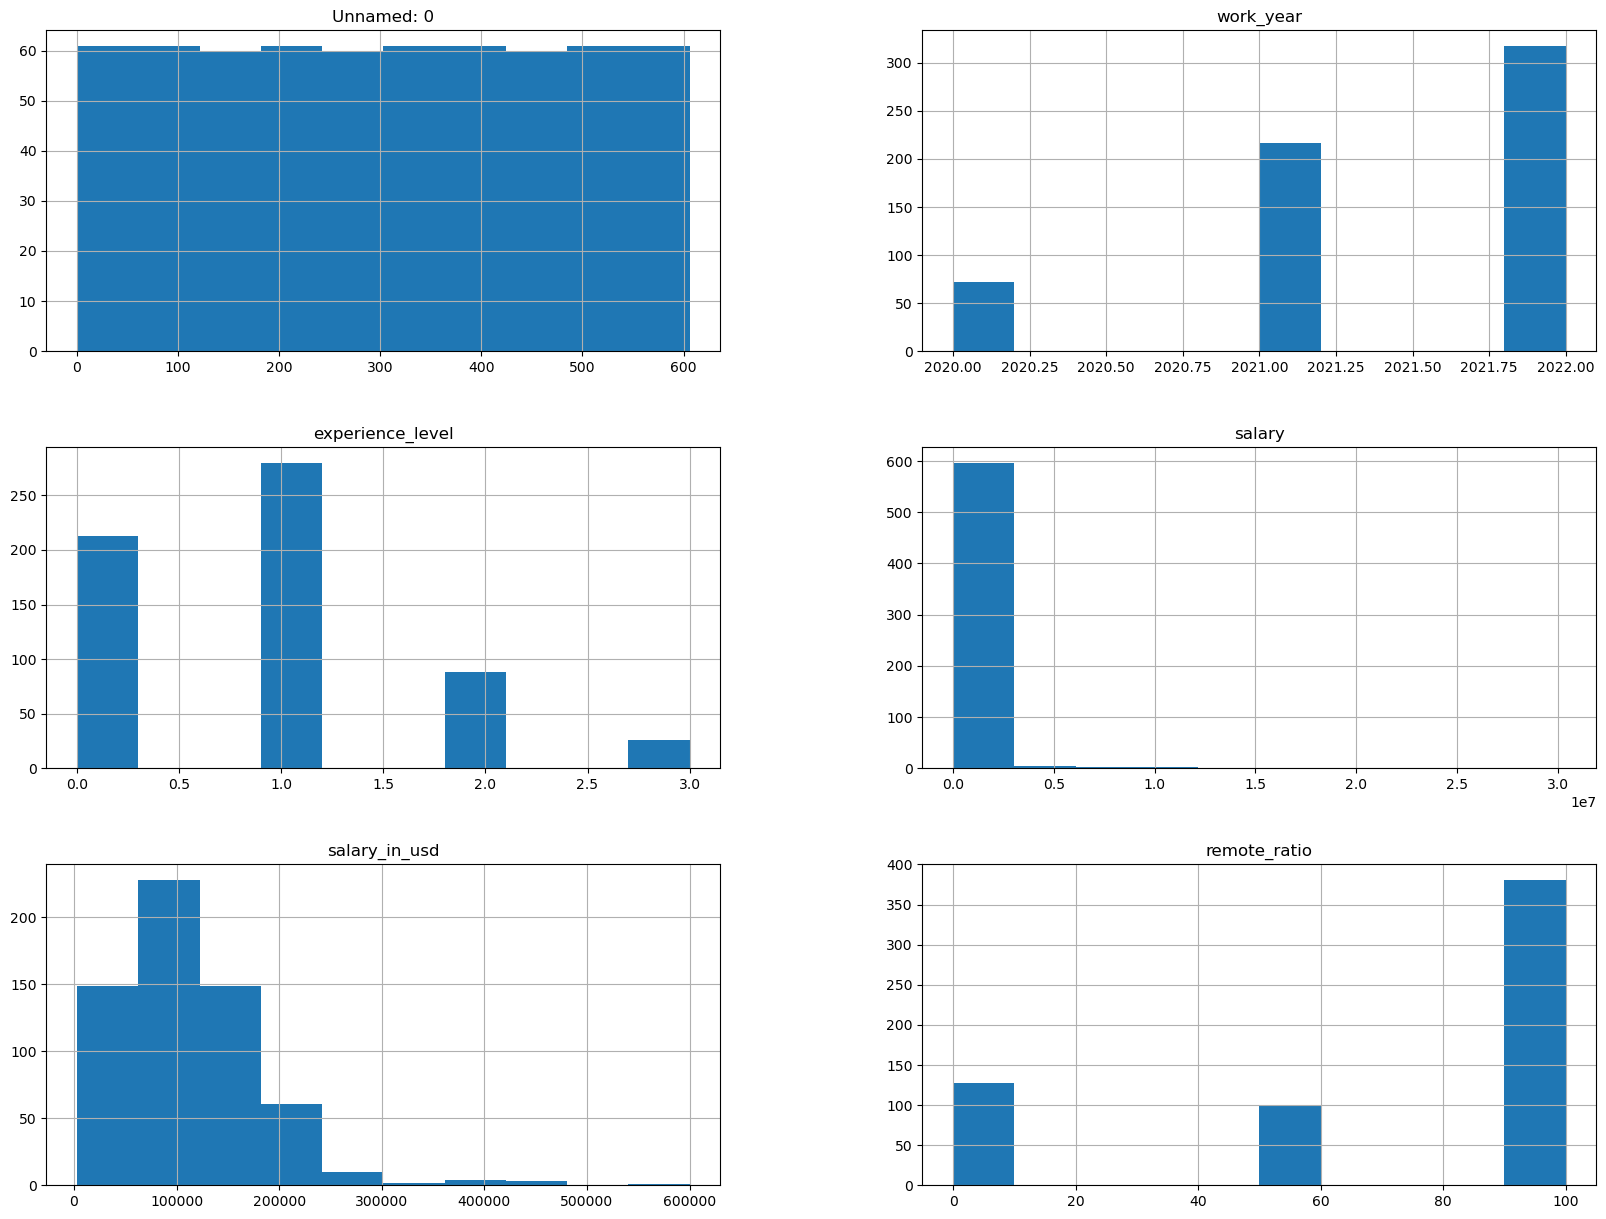

In [44]:
DataScience.hist(bins=10, figsize=(20,15))
plt.show()


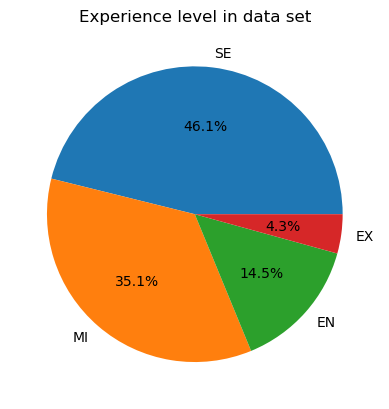

In [45]:
labels=['SE','MI','EN','EX']
plt.pie(DataScience.experience_level.value_counts(),autopct='%1.1f%%',labels=labels)   
plt.title('Experience level in data set')
plt.show()

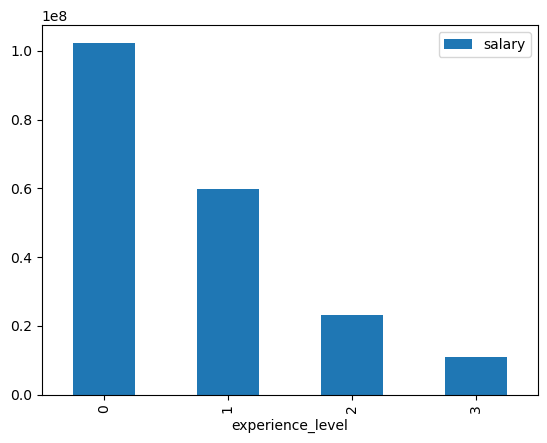

In [46]:
#create a graph with age and total purchase of each age group

DataScience.groupby('experience_level')['salary'].sum().plot(kind='bar')
plt.legend()

In [47]:
import seaborn as sn
from matplotlib import pyplot as plt


In [48]:
DataScience.drop(['experience_level'],axis=1)

,Unnamed: 0,work_year,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Experience
0,0,2020,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,False
1,1,2020,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,True
2,2,2020,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,True
3,3,2020,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,False
4,4,2020,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,True
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,FT,Data Engineer,154000,USD,154000,US,100,US,M,True
603,603,2022,FT,Data Engineer,126000,USD,126000,US,100,US,M,True
604,604,2022,FT,Data Analyst,129000,USD,129000,US,0,US,M,True
605,605,2022,FT,Data Analyst,150000,USD,150000,US,100,US,M,True


In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [50]:
DataScience['Experience']=le.fit_transform(DataScience['Experience'])
DataScience['employment_type']=le.fit_transform(DataScience['employment_type'])
DataScience['job_title']=le.fit_transform(DataScience['job_title'])
DataScience['salary_currency']=le.fit_transform(DataScience['salary_currency'])
DataScience['employee_residence']=le.fit_transform(DataScience['employee_residence'])
DataScience['company_location']=le.fit_transform(DataScience['company_location'])
DataScience['company_size']=le.fit_transform(DataScience['company_size'])



In [51]:
#how what is the highest relations to purchase 
corr_matrix=DataScience.corr()
corr_matrix['experience_level'].sort_values(ascending=False) 

experience_level      1.000000
salary_in_usd         0.150924
Experience            0.137742
salary_currency       0.115212
employee_residence    0.092450
remote_ratio          0.091606
company_size          0.084779
company_location      0.057769
employment_type       0.004473
job_title            -0.005490
work_year            -0.018915
Unnamed: 0           -0.031257
salary               -0.043905
Name: experience_level, dtype: float64

In [52]:
corr_matrix["work_year"].sort_values(ascending=False)


work_year             1.000000
Unnamed: 0            0.886550
Experience            0.294008
salary_currency       0.202420
employee_residence    0.193552
company_location      0.181515
salary_in_usd         0.170493
company_size          0.078764
remote_ratio          0.076314
employment_type       0.016323
experience_level     -0.018915
salary               -0.087577
job_title            -0.162560
Name: work_year, dtype: float64

In [53]:
print(DataScience.corr())


                    Unnamed: 0  work_year  experience_level  employment_type  \
Unnamed: 0            1.000000   0.886550         -0.031257         0.001431   
work_year             0.886550   1.000000         -0.018915         0.016323   
experience_level     -0.031257  -0.018915          1.000000         0.004473   
employment_type       0.001431   0.016323          0.004473         1.000000   
job_title            -0.140975  -0.162560         -0.005490        -0.101823   
salary               -0.096250  -0.087577         -0.043905         0.000536   
salary_currency       0.191409   0.202420          0.115212        -0.087365   
salary_in_usd         0.167025   0.170493          0.150924        -0.123545   
employee_residence    0.183887   0.193552          0.092450        -0.109979   
remote_ratio          0.095000   0.076314          0.091606        -0.045592   
company_location      0.162139   0.181515          0.057769        -0.083661   
company_size          0.090137   0.07876

In [55]:


corr_matrix["job_title"].sort_values(ascending=False)


job_title             1.000000
salary_in_usd         0.131016
salary                0.027710
Experience            0.002317
experience_level     -0.005490
company_size         -0.031011
remote_ratio         -0.058589
employment_type      -0.101823
employee_residence   -0.119135
Unnamed: 0           -0.140975
company_location     -0.147379
salary_currency      -0.149591
work_year            -0.162560
Name: job_title, dtype: float64

In [56]:
corr_matrix["company_location"].sort_values(ascending=False)

company_location      1.000000
employee_residence    0.897704
salary_currency       0.787084
salary_in_usd         0.428994
Experience            0.291799
work_year             0.181515
remote_ratio          0.169083
Unnamed: 0            0.162139
experience_level      0.057769
company_size         -0.066554
salary               -0.082894
employment_type      -0.083661
job_title            -0.147379
Name: company_location, dtype: float64

In [57]:
corr_matrix["experience_level"].sort_values(ascending=False)

experience_level      1.000000
salary_in_usd         0.150924
Experience            0.137742
salary_currency       0.115212
employee_residence    0.092450
remote_ratio          0.091606
company_size          0.084779
company_location      0.057769
employment_type       0.004473
job_title            -0.005490
work_year            -0.018915
Unnamed: 0           -0.031257
salary               -0.043905
Name: experience_level, dtype: float64

In [59]:
ds1=DataScience[["salary_in_usd","salary_currency","employee_residence","remote_ratio","company_size","company_location"]]
ds2=DataScience[["salary_currency","employee_residence","company_location","salary_in_usd","company_size"]]
ds3=DataScience[["employee_residence","salary_currency","salary_in_usd"]]

In [60]:
DataScience.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Experience
0,0,2020,0,2,22,70000,7,79833,14,0,12,0,0
1,1,2020,1,2,41,260000,16,260000,32,0,29,2,1
2,2,2020,1,2,7,85000,8,109024,20,50,18,1,1
3,3,2020,0,2,47,20000,16,20000,23,0,20,2,0
4,4,2020,1,2,38,150000,16,150000,55,50,48,0,1


In [61]:
DataScience.drop(columns=DataScience.columns[0],axis=1,inplace=True)

In [62]:
DataScience.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Experience
0,2020,0,2,22,70000,7,79833,14,0,12,0,0
1,2020,1,2,41,260000,16,260000,32,0,29,2,1
2,2020,1,2,7,85000,8,109024,20,50,18,1,1
3,2020,0,2,47,20000,16,20000,23,0,20,2,0
4,2020,1,2,38,150000,16,150000,55,50,48,0,1


In [63]:
ds1=DataScience[["salary_in_usd","salary_currency","employee_residence","remote_ratio","company_size","company_location"]]
ds2=DataScience[["salary_currency","employee_residence","company_location","salary_in_usd","company_size"]]
ds3=DataScience[["employee_residence","salary_currency","salary_in_usd"]]


In [65]:
import sklearn
from sklearn.model_selection import train_test_split
y=DataScience['Experience']
X=DataScience[['employment_type','salary_currency']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [67]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    

In [68]:
from sklearn.neighbors import KNeighborsClassifier
probs= knn.predict_proba(X_test)
probs = probs[:,1]

In [69]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,probs,pos_label=1)

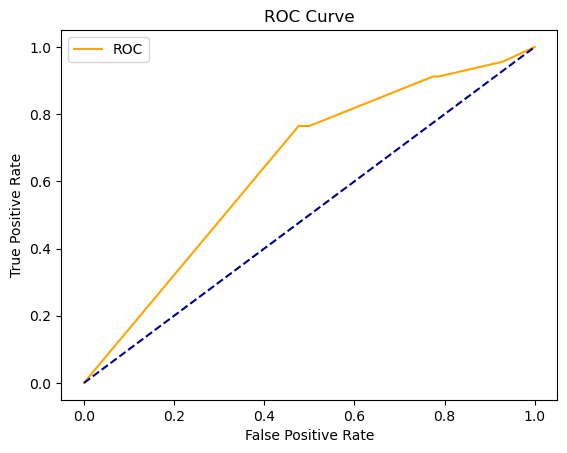

In [70]:
plot_roc_curve(fpr,tpr)

In [71]:
y_actual = pd.Series(y_test,name='actual')
y_predicted=pd.Series(y_pred,name='predicted')
print(pd.crosstab(y_actual,y_predicted))


predicted  0   1
actual          
0          2  30
1          5   8


<AxesSubplot:>

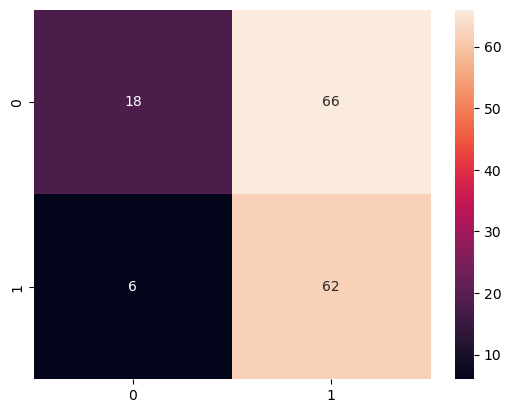

In [72]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.21      0.33        84
           1       0.48      0.91      0.63        68

    accuracy                           0.53       152
   macro avg       0.62      0.56      0.48       152
weighted avg       0.63      0.53      0.47       152



In [75]:


cm = confusion_matrix(y_test, y_pred)
tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
print('tp', 'fp', 'fn', 'tn')
print(tp, fp, fn, tn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(y_pred, y_test))
print('recall = ', recall_score(y_pred, y_test))
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)


tp fp fn tn
18 66 6 62
sensitivity = 0.75
specificity = 0.484375
precision = 0.9117647058823529
recall =  0.484375
AUC: 0.563


In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold_validation=KFold(10)
result=cross_val_score(knn,X,y,cv=kfold_validation)
print(result)
print(np.mean(result))


[0.3442623  0.68852459 0.72131148 0.60655738 0.60655738 0.26229508
 0.81967213 0.6        0.6        0.11666667]
0.5365846994535518


In [77]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X,y)
#gprobability= nb.predict_proba(X_test)
gprobability= nb.predict(X_test)
print("nb score accurate:",nb.score(X_test,y_test))


nb score accurate: 0.5789473684210527


<AxesSubplot:>

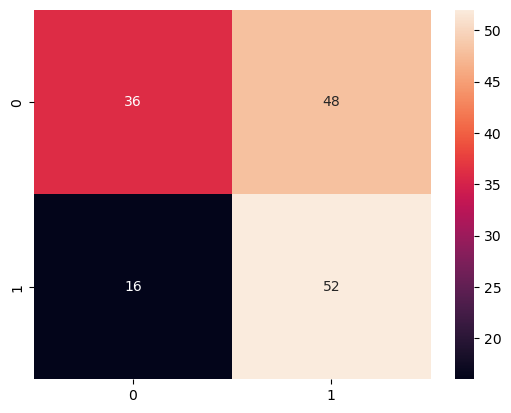

In [78]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,gprobability),annot=True)


In [79]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [80]:
from sklearn.naive_bayes import GaussianNB
probs= nb.predict_proba(X_test)
probs = probs[:,1]


In [81]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,probs,pos_label=1)


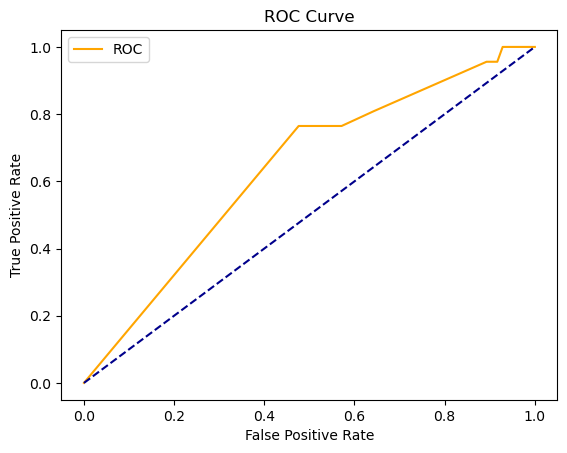

In [82]:
plot_roc_curve(fpr,tpr)

In [83]:
cm = confusion_matrix(y_test, gprobability)
tp, fp, tn, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(gprobability, y_test))
print('recall = ', recall_score(gprobability, y_test))
auc = roc_auc_score(y_test, gprobability)
print('AUC: %.3f' % auc)

tp fp tn fn
36 48 52 16
sensitivity = 0.6923076923076923
specificity = 0.52
precision = 0.7647058823529411
recall =  0.52
AUC: 0.597


In [84]:
from sklearn.naive_bayes import MultinomialNB
multi = MultinomialNB()
multi.fit(X,y)
#gprobability= nb.predict_proba(X_test)
mnb= multi.predict(X_test)
print("nb score accurate:",multi.score(X_test,y_test))


nb score accurate: 0.5328947368421053


<AxesSubplot:>

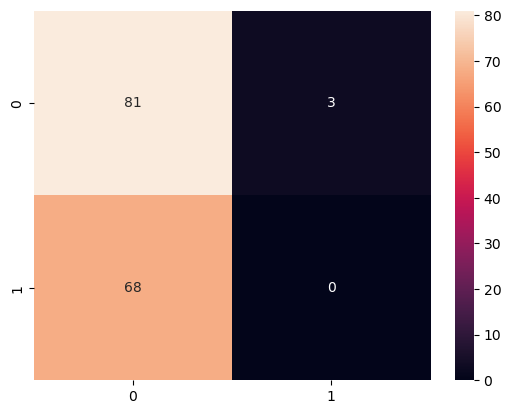

In [85]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,mnb),annot=True)

In [86]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


In [87]:
from sklearn.naive_bayes import MultinomialNB
mprobs= multi.predict_proba(X_test)
mnprobs = mprobs[:,1]


In [88]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,mnprobs,pos_label=1)

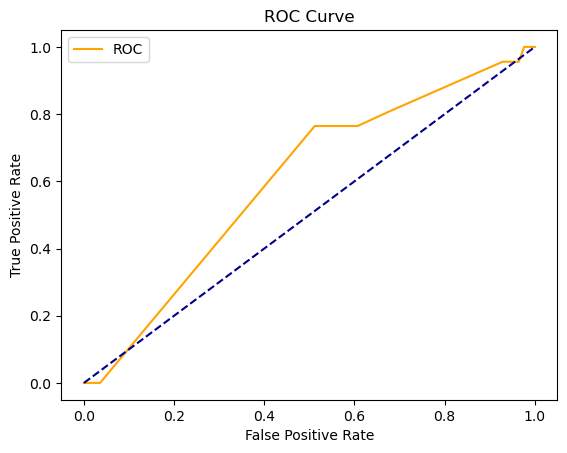

In [89]:
plot_roc_curve(fpr,tpr)


In [90]:
cm = confusion_matrix(y_test, mnb)
tp, fp, tn, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(mnb, y_test))
print('recall = ', recall_score(mnb, y_test))
auc = roc_auc_score(y_test, mnb)
print('AUC: %.3f' % auc)


tp fp tn fn
81 3 0 68
sensitivity = 0.5436241610738255
specificity = 0.0
precision = 0.0
recall =  0.0
AUC: 0.482


In [91]:
from sklearn.naive_bayes import ComplementNB
comp = ComplementNB()
comp.fit(X,y)
#gprobability= nb.predict_proba(X_test)
cnb= comp.predict(X_test)
print("nb score accurate:",comp.score(X_test,y_test))


nb score accurate: 0.5986842105263158


<AxesSubplot:>

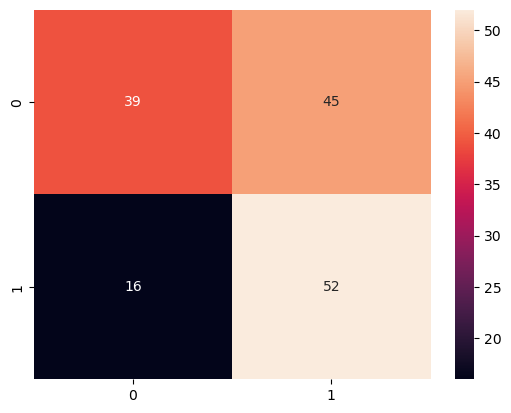

In [92]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,cnb),annot=True)


In [93]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


In [94]:
from sklearn.naive_bayes import ComplementNB
probs= comp.predict_proba(X_test)
probs = probs[:,1]

In [95]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,probs,pos_label=1)


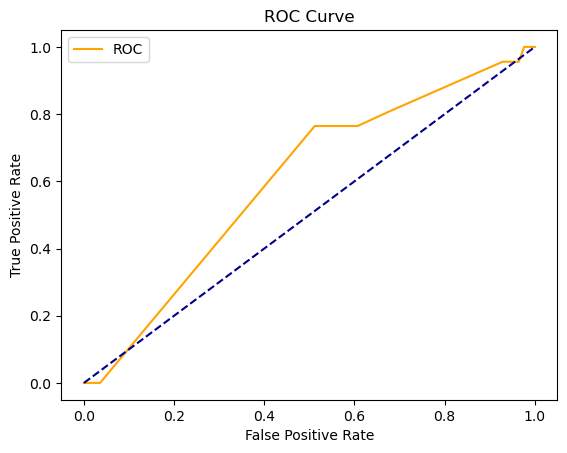

In [96]:
plot_roc_curve(fpr,tpr)


In [97]:
cm = confusion_matrix(y_test, cnb)
tp, fp, tn, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(cnb, y_test))
print('recall = ', recall_score(cnb, y_test))
auc = roc_auc_score(y_test, cnb)
print('AUC: %.3f' % auc)

tp fp tn fn
39 45 52 16
sensitivity = 0.7090909090909091
specificity = 0.5360824742268041
precision = 0.7647058823529411
recall =  0.5360824742268041
AUC: 0.614


In [99]:


from sklearn.naive_bayes import BernoulliNB
berny = BernoulliNB()
berny.fit(X,y)
#gprobability= nb.predict_proba(X_test)
bnb= berny.predict(X_test)
print("nb score accurate:",berny.score(X_test,y_test))


nb score accurate: 0.5526315789473685


<AxesSubplot:>

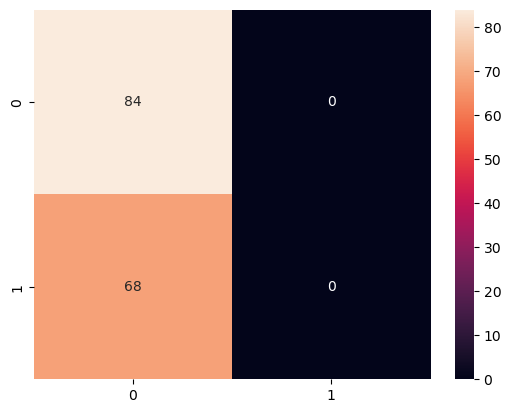

In [100]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,bnb),annot=True)


In [101]:
from sklearn.naive_bayes import BernoulliNB
probs= berny.predict_proba(X_test)
probs = probs[:,1]


In [102]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,probs,pos_label=1)


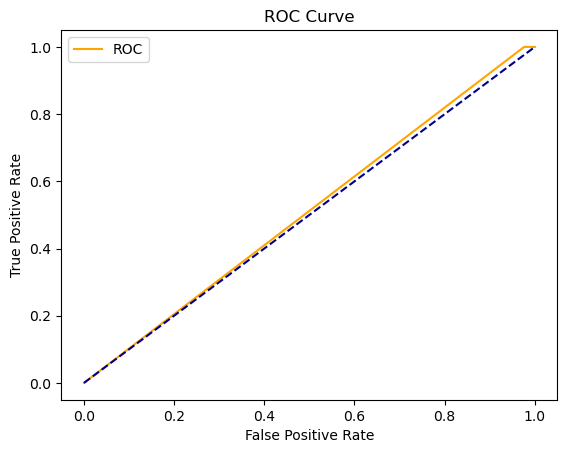

In [103]:
plot_roc_curve(fpr,tpr)


In [104]:
cm = confusion_matrix(y_test, bnb)
tp, fp, tn, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(bnb, y_test))
print('recall = ', recall_score(bnb, y_test))
auc = roc_auc_score(y_test, bnb)
print('AUC: %.3f' % auc)


tp fp tn fn
84 0 0 68
sensitivity = 0.5526315789473685
specificity = nan
precision = 0.0
recall =  0.0
AUC: 0.500


/var/folders/n7/nr5ftxr949scbgb4k_r1nmhc0000gn/T/ipykernel_2350/3071251689.py:7: RuntimeWarning: invalid value encountered in long_scalars
  print('specificity =' ,(tn / (tn+fp)))
/Users/mac/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
from sklearn.naive_bayes import CategoricalNB
cate = CategoricalNB()
cate.fit(X,y)
#gprobability= nb.predict_proba(X_test)
ccnb= cate.predict(X_test)
print("nb score accurate:",cate.score(X_test,y_test))


nb score accurate: 0.625


<AxesSubplot:>

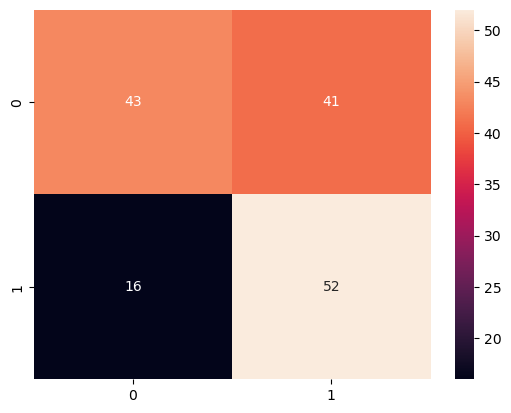

In [106]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,ccnb),annot=True)


In [107]:
from sklearn.naive_bayes import CategoricalNB
probs= cate.predict_proba(X_test)
probs = probs[:,1]


In [108]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,probs,pos_label=1)


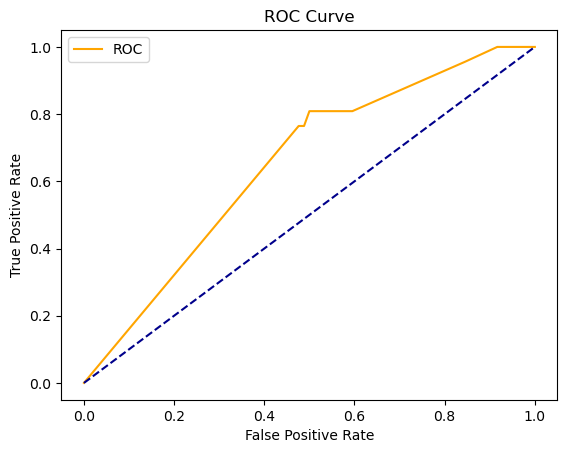

In [109]:
plot_roc_curve(fpr,tpr)


In [110]:
cm = confusion_matrix(y_test, ccnb)
tp, fp, tn, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(ccnb, y_test))
print('recall = ', recall_score(ccnb, y_test))
auc = roc_auc_score(y_test, ccnb)
print('AUC: %.3f' % auc)


tp fp tn fn
43 41 52 16
sensitivity = 0.7288135593220338
specificity = 0.5591397849462365
precision = 0.7647058823529411
recall =  0.5591397849462365
AUC: 0.638


In [113]:
def biningFunction(col,cut_points,labels=None):
    minval = col.min()
    maxval= col.max()
    break_points=[minval]+ cut_points+ [maxval]
    print(break_points)
    if not labels:
        labels=range(len(cut_points)+1)
        colBin= pd.cut(col,bins=break_points,labels=labels,inclde_lowest=True)
        return colBin

In [115]:
print("Keys of data set are",DataScience.keys())



Keys of data set are Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'Experience'],
      dtype='object')


In [123]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import label_binarize
import sklearn
from sklearn.model_selection import train_test_split
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score


In [125]:
df=pd.read_csv('/Users/mac/Downloads/ds_salaries.csv')


In [126]:
Location_US= df["company_location"]=="US"
df["Location"]=Location_US
df.drop(['company_location'], axis=1)
df.drop(columns=df.columns[0],axis=1,inplace=True)
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Location
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,False
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,False
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,False
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,False
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,True
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,True
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,True
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,True
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,True


In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [128]:
df['work_year']=le.fit_transform(df['work_year'])
df['Location']=le.fit_transform(df['Location'])
df['employee_residence']=le.fit_transform(df['employee_residence'])
df['salary_currency']=le.fit_transform(df['salary_currency'])
df['employment_type']=le.fit_transform(df['employment_type'])
df['experience_level']=le.fit_transform(df['experience_level'])
df['job_title']=le.fit_transform(df['job_title'])
df['company_location']=le.fit_transform(df['company_location'])
df['company_size']=le.fit_transform(df['company_size'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           607 non-null    int64
 1   experience_level    607 non-null    int64
 2   employment_type     607 non-null    int64
 3   job_title           607 non-null    int64
 4   salary              607 non-null    int64
 5   salary_currency     607 non-null    int64
 6   salary_in_usd       607 non-null    int64
 7   employee_residence  607 non-null    int64
 8   remote_ratio        607 non-null    int64
 9   company_location    607 non-null    int64
 10  company_size        607 non-null    int64
 11  Location            607 non-null    int64
dtypes: int64(12)
memory usage: 57.0 KB
